# More advanced plotting with Pandas/Matplotlib

<div class="alert alert-info">

Finnish university students are encouraged to use the CSC Notebooks platform.<br/>
<a href="https://notebooks.csc.fi/#/blueprint/7e62ac3bddf74483b7ac7333721630e2"><img alt="CSC badge" src="https://img.shields.io/badge/launch-CSC%20notebook-blue.svg" style="vertical-align:text-bottom"></a>

Others can follow the lesson and fill in their student notebooks using Binder.<br/>
<a href="https://mybinder.org/v2/gh/geo-python/notebooks/master?urlpath=lab/tree/L4/functions.ipynb"><img alt="Binder badge" src="https://img.shields.io/badge/launch-binder-red.svg" style="vertical-align:text-bottom"></a>

</div>

At this point you should know the basics of making plots with Matplotlib module.
Now we will expand on our basic plotting skills to learn how to create more advanced plots.
In this part, we will show how to visualize data using Pandas/Matplotlib and create plots such as the one below.

![Subplot example in Matplotlib](img/subplots.png)

## The data

In this part of the lesson we'll continue working with our weather observation data from the Helsinki-Vantaa airport [downloaded from NOAA](https://www7.ncdc.noaa.gov/CDO/cdopoemain.cmd?datasetabbv=DS3505&countryabbv=&georegionabbv=&resolution=40).

## Getting started

Let's start again by importing the libraries we'll need.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the data

Now we'll load the data just as we did in the first part of the lesson: 
- Set whitespace as delimiter
- Specify no data values
- Specify a subset of columns
- Parse `'YR--MODAHRMN'` column as a datetime index

Reading in the data might take a few moments.

In [5]:
fp = r"data/029740.txt"

data = pd.read_csv(fp, delim_whitespace=True, 
                   na_values=['*', '**', '***', '****', '*****', '******'],
                   usecols=['YR--MODAHRMN', 'TEMP', 'MAX', 'MIN'],
                   parse_dates=['YR--MODAHRMN'], index_col='YR--MODAHRMN')

In [6]:
print("Number of rows:", len(data))

Number of rows: 931767


We are dealing with a relatively large data set.

Let's have a closer look at the time first rows of data: 

In [7]:
data.head()

,TEMP,MAX,MIN
YR--MODAHRMN,,,
1952-01-01 00:00:00,36.0,NaN,NaN
1952-01-01 06:00:00,37.0,NaN,34.0
1952-01-01 12:00:00,39.0,NaN,NaN
1952-01-01 18:00:00,36.0,39.0,NaN
1952-01-02 00:00:00,36.0,NaN,NaN


Let's rename the `'TEMP'` column as `TEMP_F`, since we'll later convert our temperatures from Fahrenheit to Celsius.

In [11]:
new_names = {'TEMP':'TEMP_F'}
data = data.rename(columns=new_names)

Check again the first rows of data to confirm successful renaming:

In [12]:
data.head()

,TEMP_F,MAX,MIN
YR--MODAHRMN,,,
1952-01-01 00:00:00,36.0,NaN,NaN
1952-01-01 06:00:00,37.0,NaN,34.0
1952-01-01 12:00:00,39.0,NaN,NaN
1952-01-01 18:00:00,36.0,39.0,NaN
1952-01-02 00:00:00,36.0,NaN,NaN


## Preparing the data

First, we have to deal with no data values. Let's check how many no data values we have:

In [13]:
print('Number of no data values per column: ')
print(data.isna().sum())

Number of no data values per column: 
TEMP_F      3579
MAX       900880
MIN       900896
dtype: int64


So, we have 3579 missing values in the TEMP_F column. Let's get rid of those. We need not worry about the no data values in `'MAX'` and `'MIN'` columns since we won't be using them for plotting. 

We can remove rows from our DataFrame where `'TEMP_F'` is missing values using the `dropna()` method: 

In [14]:
data.dropna(subset=['TEMP_F'], inplace=True)

In [15]:
print("Number of rows after removing no data values:", len(data))

Number of rows after removing no data values: 928188


That's better.

### Check your understanding

What would happen if we removed all rows with any no data values from our data (also considering no data values in the `MAX` and `MIN` columns)?

In [16]:
# Calculate the number of rows after removing all no data values
# Note: Do not apply .dropna() with the "inplace" parameter!
len(data.dropna())

20433

In [17]:
# Calculate the number of rows without removing all rows containing NA values
len(data)

928188

### Converting temperatures to Celsius

Now that we have loaded our data, we can convert the values of temperature in Fahrenheit to Celsius, like we have in earlier lessons.

In [18]:
data["TEMP_C"] = (data["TEMP_F"] - 32.0) / 1.8

Let's check how our dataframe looks like at this point:

In [19]:
data.head()

,TEMP_F,MAX,MIN,TEMP_C
YR--MODAHRMN,,,,
1952-01-01 00:00:00,36.0,NaN,NaN,2.222222
1952-01-01 06:00:00,37.0,NaN,34.0,2.777778
1952-01-01 12:00:00,39.0,NaN,NaN,3.888889
1952-01-01 18:00:00,36.0,39.0,NaN,2.222222
1952-01-02 00:00:00,36.0,NaN,NaN,2.222222


## Using subplots

Let's continue working with the weather data and learn how to use *subplots*. Subplots are figures where you have multiple plots in different panels of the same figure, as was shown at the start of the lesson.

### Extracting seasonal temperatures

Let's now select data from different seasons of the year in 2012/2013:

- Winter (December 2012 - February 2013)
- Spring (March 2013 - May 2013)
- Summer (June 2013 - August 2013)
- Autumn (Septempber 2013 - November 2013)

In [20]:
# Type in the example for winter
winter = data.loc[(data.index >= '201212010000') & (data.index < '201303010000')]
winter_temps = winter['TEMP_C']

spring = data.loc[(data.index >= '201303010000') & (data.index < '201306010000')]
spring_temps = spring['TEMP_C']

summer = data.loc[(data.index >= '201306010000') & (data.index < '201309010000')]
summer_temps = summer['TEMP_C']

autumn = data.loc[(data.index >= '201309010000') & (data.index < '201312010000')]
autumn_temps = autumn['TEMP_C']

Now we can plot our data to see how the different seasons look separately.

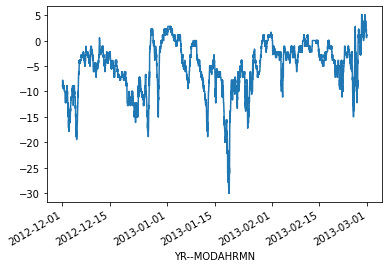

In [21]:
# Example plot for winter
ax1 = winter_temps.plot()

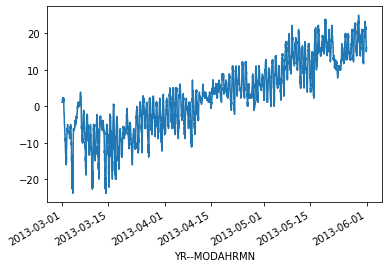

In [22]:
# Spring
ax2 = spring_temps.plot()

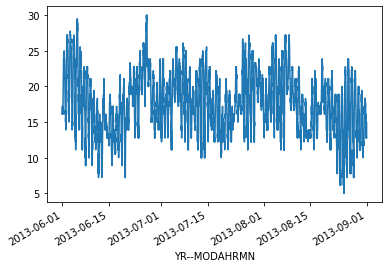

In [23]:
# Summer
ax3 = summer_temps.plot()

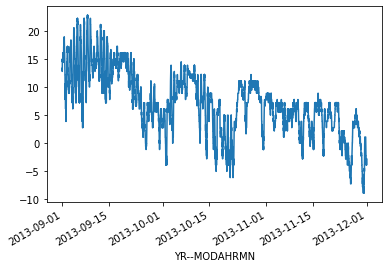

In [24]:
# Autumn
ax4 = autumn_temps.plot()

OK, so from these plots we can already see that the temperatures in different seasons are quite different, which is rather obvious of course.
It is important to also notice that the scale of the *y*-axis changes in these different plots.
If we would like to compare different seasons to each other we need to make sure that the temperature scale is similar in the plots of the different seasons.

### Finding data bounds

Let's set our *y*-axis limits so that the upper limit is the maximum temperature + 5 degrees in our data (full year), and the lowest is the minimum temperature - 5 degrees.

In [25]:
# Find minimum seasonal temperature
min_temp = min(winter_temps.min(), spring_temps.min(), summer_temps.min(), autumn_temps.min())
min_temp = min_temp - 5.0

# Find maximum seasonal temperature
max_temp = max(winter_temps.max(), spring_temps.max(), summer_temps.max(), autumn_temps.max())
max_temp = max_temp + 5.0

# Print y-axis min, max
print("Min:", min_temp, "Max:", max_temp)

Min: -35.0 Max: 35.0


We can now use this temperature range to standardize the y-axis scale of our plot.

### Creating our first set of subplots

Let's now continue and see how we can plot all these different plots into the same figure.
We can create a 2x2 panel for our visualization using Matplotlib’s `subplots()` function where we specify how many rows and columns we want to have in our figure.
We can also specify the size of our figure with `figsize()` parameter that takes the `width` and `height` values (in inches) as input.

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

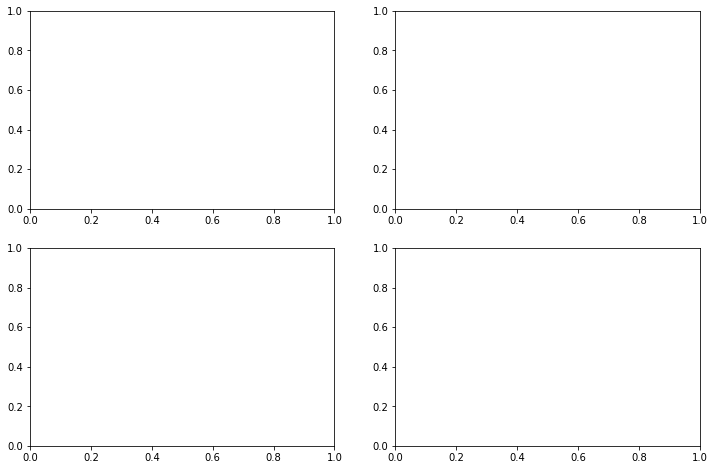

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8));
axs

We can see that as a result we have now a list containing two nested lists where the first one contains the axis for column 1 and 2 on **row 1** and the second list contains the axis for columns 1 and 2 for **row 2**.

We can parse these axes into own variables so it is easier to work with them.

In [27]:
ax11 = axs[0][0]
ax12 = axs[0][1]
ax21 = axs[1][0]
ax22 = axs[1][1]

Now we have four different axis variables for different panels in our figure.
Next we can use them to plot the seasonal data into them.
Let's first plot the seasons and give different colors for the lines, and specify the *y*-scale limits to be the same with all subplots.
- `c` parameter changes the color of the line.You can find an extensive list of possible colors and RGB-color codes from [this link](http://www.rapidtables.com/web/color/RGB_Color.htm).
- `lw` parameter controls the width of the line.
- `ylim` parameter controls the y-axis limits

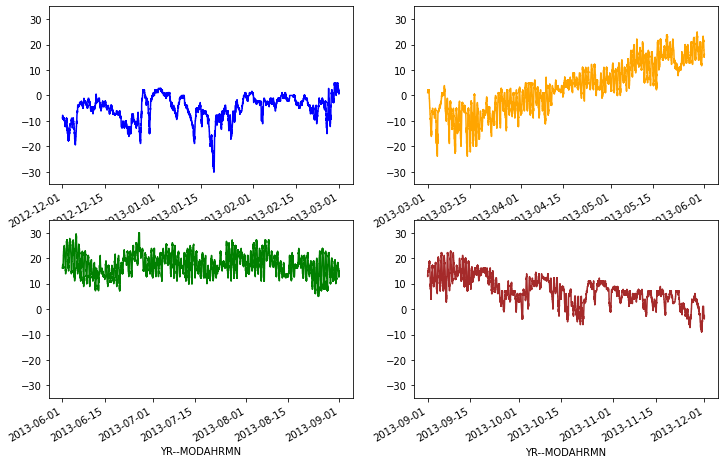

In [28]:
# Set plot line width
line_width = 1.5

# Plot data
# Winter
winter_temps.plot(ax=ax11, c='blue', lw=line_width, ylim=[min_temp, max_temp])
# Spring
spring_temps.plot(ax=ax12, c='orange', lw=line_width, ylim=[min_temp, max_temp])

# Summer
summer_temps.plot(ax=ax21, c='green', lw=line_width, ylim=[min_temp, max_temp])

# Autumn
autumn_temps.plot(ax=ax22, c='brown', lw=line_width, ylim=[min_temp, max_temp])

# Display figure
fig

Great, now we have all the plots in same figure! However, we can see that there are some problems with our *x*-axis labels and a few missing items we can add. Let's do that below.

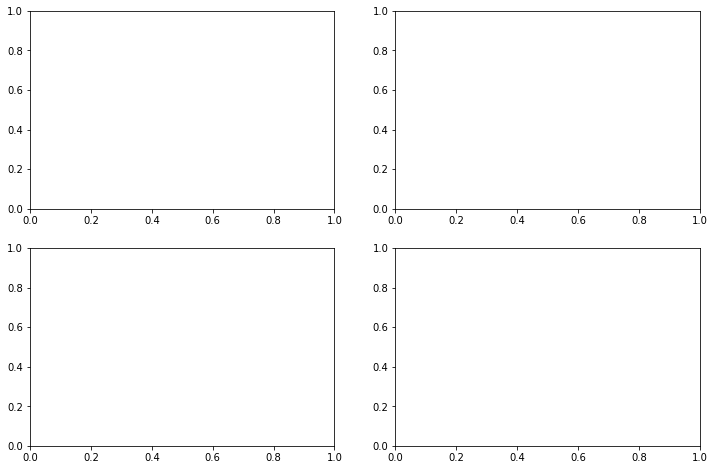

In [29]:
# Create the new figure and subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# Rename the axes for ease of use
ax11 = axs[0][0]
ax12 = axs[0][1]
ax21 = axs[1][0]
ax22 = axs[1][1]

Now, we'll add our seasonal temperatures to the plot commands for each time period.

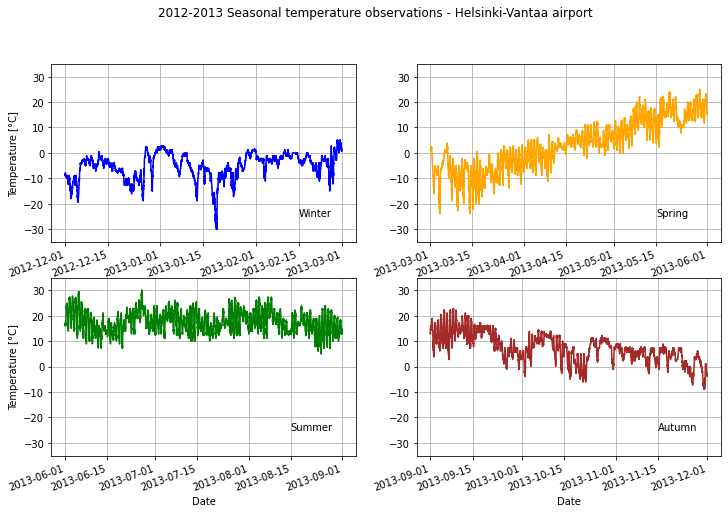

In [30]:
# Set plot line width
line_width = 1.5

# Plot data
winter_temps.plot(ax=ax11, c='blue', lw=line_width, 
                  ylim=[min_temp, max_temp], grid=True)
spring_temps.plot(ax=ax12, c='orange', lw=line_width,
                  ylim=[min_temp, max_temp], grid=True)
summer_temps.plot(ax=ax21, c='green', lw=line_width,
                  ylim=[min_temp, max_temp], grid=True)
autumn_temps.plot(ax=ax22, c='brown', lw=line_width,
                  ylim=[min_temp, max_temp], grid=True)

# Set figure title
fig.suptitle('2012-2013 Seasonal temperature observations - Helsinki-Vantaa airport')

# Rotate the x-axis labels so they don't overlap
plt.setp(ax11.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax12.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax21.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax22.xaxis.get_majorticklabels(), rotation=20)

# Axis labels
ax21.set_xlabel('Date')
ax22.set_xlabel('Date')
ax11.set_ylabel('Temperature [°C]')
ax21.set_ylabel('Temperature [°C]')

# Season label text
ax11.text(pd.to_datetime('20130215'), -25, 'Winter')
ax12.text(pd.to_datetime('20130515'), -25, 'Spring')
ax21.text(pd.to_datetime('20130815'), -25, 'Summer')
ax22.text(pd.to_datetime('20131115'), -25, 'Autumn')

# Display plot
fig

Not bad.

### Check your understading

Visualize only the winter and summer temperatures in a 1x2 panel figure.
Save the figure as a .png file.

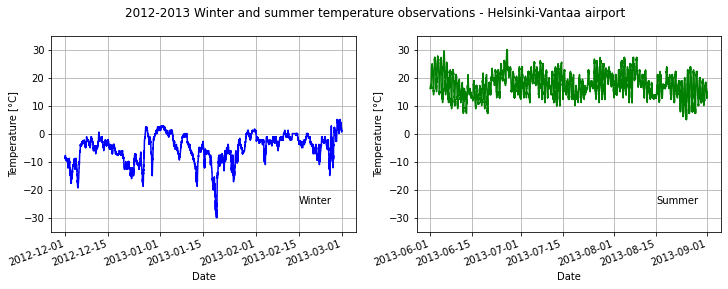

In [31]:
# Two subplots side-by-side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Set plot line width
line_width = 1.5

# Plot data
winter_temps.plot(ax=axs[0], c='blue', lw=line_width, 
                  ylim=[min_temp, max_temp], grid=True)
summer_temps.plot(ax=axs[1], c='green', lw=line_width,
                  ylim=[min_temp, max_temp], grid=True)

# Set figure title
fig.suptitle('2012-2013 Winter and summer temperature observations - Helsinki-Vantaa airport')

# Rotate the x-axis labels so they don't overlap
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=20)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=20)

# Axis labels
axs[0].set_xlabel('Date')
axs[1].set_xlabel('Date')
axs[0].set_ylabel('Temperature [°C]')
axs[1].set_ylabel('Temperature [°C]')

# Season label text
axs[0].text(pd.to_datetime('20130215'), -25, 'Winter')
axs[1].text(pd.to_datetime('20130815'), -25, 'Summer')

plt.savefig("HelsinkiVantaa_WinterSummer_2012-2013.png")